<a href="https://colab.research.google.com/github/praseedm/PGMP/blob/main/Interpolation_samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.youtube.com/watch?v=eI1wjDGlics
# https://github.com/jvdkwast/PCRasterTutorials/tree/main/GroundwaterInterpolation/Data

In [2]:
import pandas as pd

In [3]:
fp = './t.txt'

In [6]:
df = pd.read_csv("./t.txt", header=None, delim_whitespace=True)

In [7]:
df.to_csv('t.csv', index=None)

In [9]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 64.1 MB/s eta 0:00:00


In [10]:
import pandas as pd
import geopandas as gpd
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

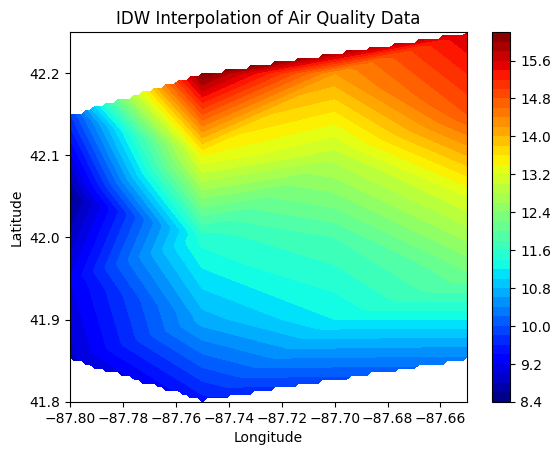

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# load data from the CSV file
data = pd.read_csv('temp_pm_data.csv')

# define the limits and spacing of the grid
x = np.linspace(data['Longitude'].min(), data['Longitude'].max(), 100)
y = np.linspace(data['Latitude'].min(), data['Latitude'].max(), 100)

# create the grid
X, Y = np.meshgrid(x, y)

# perform IDW interpolation
Z = griddata((data['Longitude'], data['Latitude']), data['PM2.5 Concentration'], (X, Y), method='linear')

# create a filled contour plot
plt.contourf(X, Y, Z, levels=50, cmap='jet')
plt.colorbar()

# add title and labels
plt.title('IDW Interpolation of Air Quality Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show the plot
plt.show()


## Ordinary Krigging

In [26]:
!!pip install pykrige

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting pykrige',
 '  Downloading PyKrige-1.7.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (860 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/860.5 KB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b860.5/860.5 KB\x1b \x1b36.8 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hRequirement already satisfied: numpy<2,>=1.14.5 in /usr/local/lib/python3.9/dist-packages (from pykrige) (1.22.4)',
 'Requirement already satisfied: scipy<2,>=1.1.0 in /usr/local/lib/python3.9/dist-packages (from pykrige) (1.10.1)',
 'Installing collected packages: pykrige',
 'Successfully installed pykrige-1.7.0']

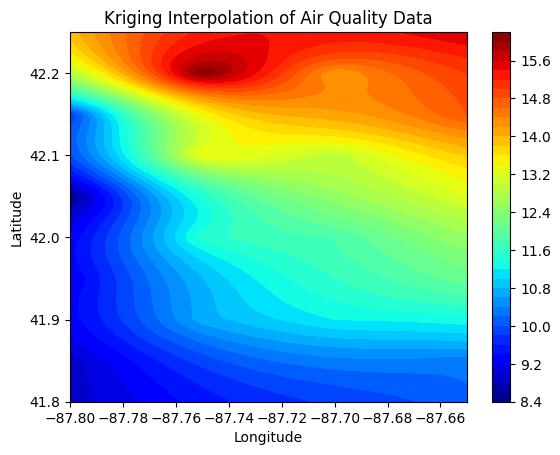

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging

# load data from the CSV file
data = pd.read_csv('temp_pm_data.csv')

# define the limits and spacing of the grid
x = np.linspace(data['Longitude'].min(), data['Longitude'].max(), 100)
y = np.linspace(data['Latitude'].min(), data['Latitude'].max(), 100)

# create the grid
X, Y = np.meshgrid(x, y)

# perform kriging interpolation
OK = OrdinaryKriging(data['Longitude'], data['Latitude'], data['PM2.5 Concentration'], variogram_model='linear', verbose=False, enable_plotting=False)
Z, _ = OK.execute('grid', x, y)

# create a filled contour plot
plt.contourf(X, Y, Z, levels=50, cmap='jet')
plt.colorbar()

# add title and labels
plt.title('Kriging Interpolation of Air Quality Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show the plot
plt.show()


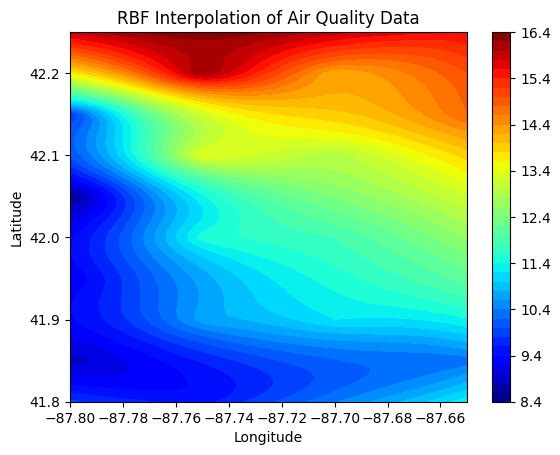

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

# load data from the CSV file
data = pd.read_csv('temp_pm_data.csv')

# define the limits and spacing of the grid
x = np.linspace(data['Longitude'].min(), data['Longitude'].max(), 100)
y = np.linspace(data['Latitude'].min(), data['Latitude'].max(), 100)

# create the grid
X, Y = np.meshgrid(x, y)

# perform RBF interpolation
rbf = Rbf(data['Longitude'], data['Latitude'], data['PM2.5 Concentration'], function='linear')
Z = rbf(X, Y)

# create a filled contour plot
plt.contourf(X, Y, Z, levels=50, cmap='jet')
plt.colorbar()

# add title and labels
plt.title('RBF Interpolation of Air Quality Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show the plot
plt.show()


## RMSE

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.interpolate import Rbf
from pykrige.ok import OrdinaryKriging

# load data from the CSV file
data = pd.read_csv('temp_pm_data.csv')

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['Longitude', 'Latitude']], data['PM2.5 Concentration'], test_size=0.3, random_state=42)

# define the limits and spacing of the grid
x = np.linspace(data['Longitude'].min(), data['Longitude'].max(), 100)
y = np.linspace(data['Latitude'].min(), data['Latitude'].max(), 100)

# create the grid
X, Y = np.meshgrid(x, y)

# perform IDW interpolation on the testing set
Z_idw = []
for i in range(len(X_test)):
    dist = np.sqrt((X_train['Longitude']-X_test.iloc[i,0])**2 + (X_train['Latitude']-X_test.iloc[i,1])**2)
    w = 1 / (dist**2)
    Z_idw.append(np.sum(w*y_train)/np.sum(w))
Z_idw = np.array(Z_idw)

# perform kriging interpolation on the testing set
OK = OrdinaryKriging(X_train['Longitude'], X_train['Latitude'], y_train, variogram_model='linear', verbose=False, enable_plotting=False)
Z_kriging, _ = OK.execute('points', X_test['Longitude'], X_test['Latitude'])

# perform RBF interpolation on the testing set
rbf = Rbf(X_train['Longitude'], X_train['Latitude'], y_train, function='linear')
Z_rbf = rbf(X_test['Longitude'], X_test['Latitude'])

# compute RMSE for each interpolation technique
RMSE_idw = np.sqrt(np.mean((y_test-Z_idw)**2))
RMSE_kriging = np.sqrt(np.mean((y_test-Z_kriging)**2))
RMSE_rbf = np.sqrt(np.mean((y_test-Z_rbf)**2))

print('RMSE for IDW interpolation:', RMSE_idw)
print('RMSE for kriging interpolation:', RMSE_kriging)
print('RMSE for RBF interpolation:', RMSE_rbf)


RMSE for IDW interpolation: 1.4131065615334506
RMSE for kriging interpolation: 1.0980018267884657
RMSE for RBF interpolation: 3.8407717740040734


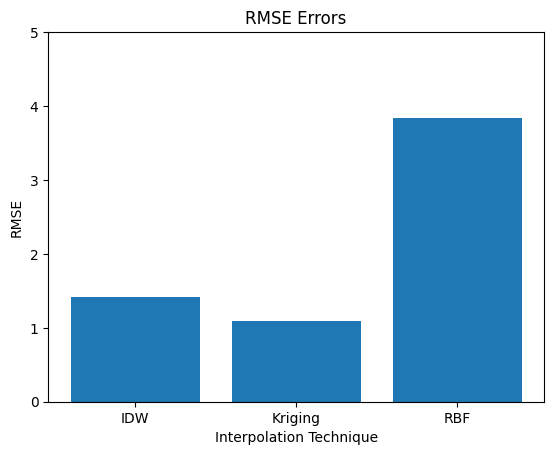

In [5]:
import numpy as np

# calculate RMSE errors for each interpolation technique
rmse_idw = np.sqrt(np.mean((y_test - Z_idw)**2))
rmse_kriging = np.sqrt(np.mean((y_test - Z_kriging)**2))
rmse_rbf = np.sqrt(np.mean((y_test - Z_rbf)**2))

# create bar chart of RMSE errors
plt.bar(['IDW', 'Kriging', 'RBF'], [rmse_idw, rmse_kriging, rmse_rbf])
plt.title('RMSE Errors')
plt.xlabel('Interpolation Technique')
plt.ylabel('RMSE')
plt.ylim(0, 5)
plt.show()


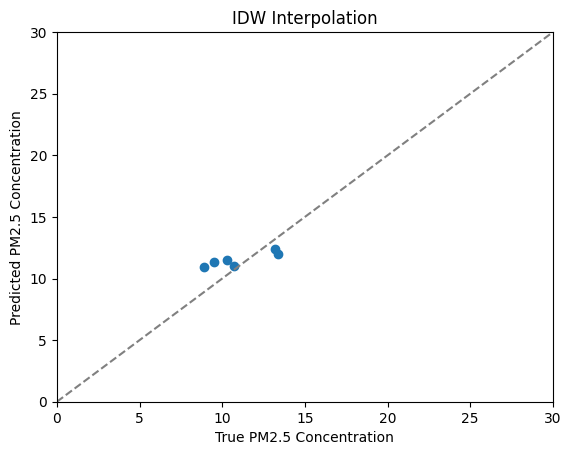

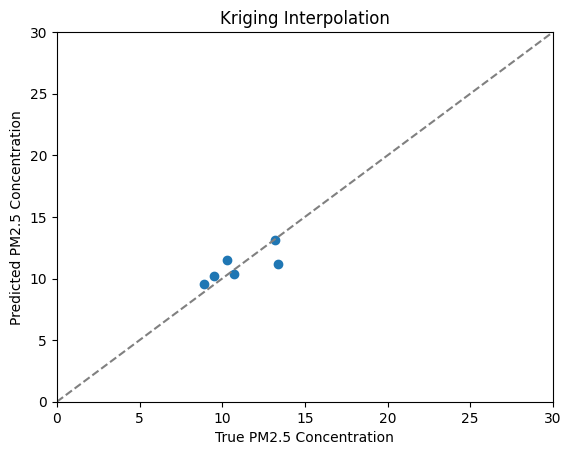

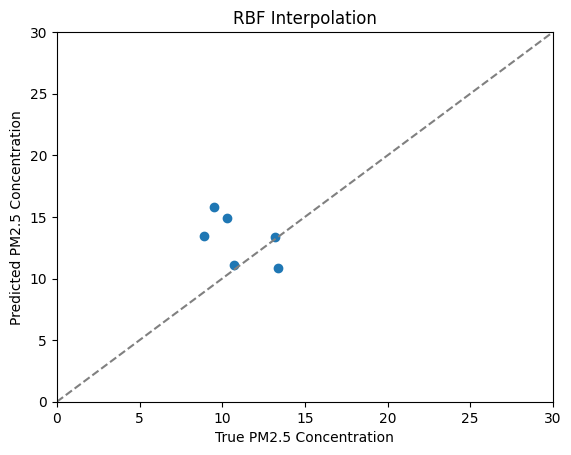

In [6]:
# create scatter plot of true PM2.5 concentrations vs. IDW predicted values
plt.scatter(y_test, Z_idw)
plt.plot([0, 30], [0, 30], linestyle='--', color='gray')
plt.title('IDW Interpolation')
plt.xlabel('True PM2.5 Concentration')
plt.ylabel('Predicted PM2.5 Concentration')
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.show()

# create scatter plot of true PM2.5 concentrations vs. kriging predicted values
plt.scatter(y_test, Z_kriging)
plt.plot([0, 30], [0, 30], linestyle='--', color='gray')
plt.title('Kriging Interpolation')
plt.xlabel('True PM2.5 Concentration')
plt.ylabel('Predicted PM2.5 Concentration')
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.show()

# create scatter plot of true PM2.5 concentrations vs. RBF predicted values
plt.scatter(y_test, Z_rbf)
plt.plot([0, 30], [0, 30], linestyle='--', color='gray')
plt.title('RBF Interpolation')
plt.xlabel('True PM2.5 Concentration')
plt.ylabel('Predicted PM2.5 Concentration')
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.show()
